In [1]:
import os
import cv2
import sys
import random
import numpy as np
import torch
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry 
from segment_anything import SamAutomaticMaskGenerator
from segment_anything import SamPredictor

In [2]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([0, 0, 0, 1.0]) #no transparency
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    return mask_image

In [3]:
import os
import cv2
import matplotlib.pyplot as plt

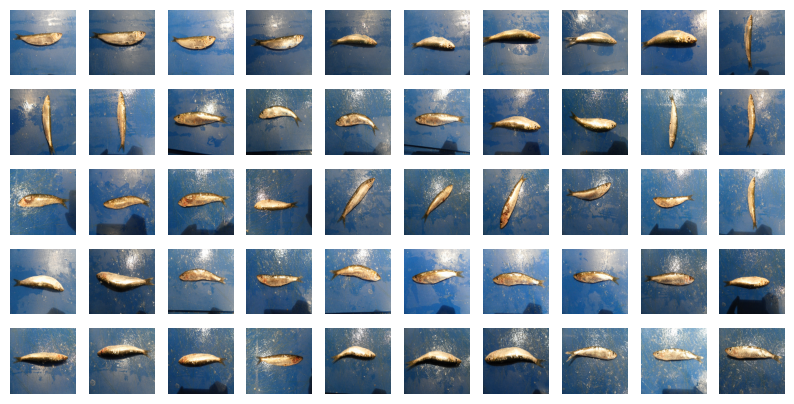

In [4]:
folder_path = 'D:\\study\\machine_learning\\classification_fish\\data\\NA_Fish_Dataset\\Black Sea Sprat'
image_paths = [os.path.join(folder_path, f"{str(i).zfill(5)}.png") for i in range(1, 51)]

plt.figure(figsize=(10, 5))

for i, img_path in enumerate(image_paths):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (128, 128))

    plt.subplot(5, 10, i + 1)
    plt.imshow(image)
    plt.axis('off')

plt.show()

In [5]:
import os
import cv2

sam_checkpoint = "E:\\sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)

path = 'D:\\study\\machine_learning\\classification_fish\\data\\NA_Fish_Dataset\\Black Sea Sprat'

folders = os.listdir(path)
for folder in folders:
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):
        image_paths = [os.path.join(folder_path, f"{str(i).zfill(5)}.png") for i in range(1, 51)]

In [6]:
input_point2 = np.array([[5,5],[195,195],[5,195],[195,5]])
input_label2 = np.array([1,1,1,1]) # label 1 (green) segmented, label 0 (red) excluded
i = 0
for img_path in image_paths:
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (128, 128))
    
    predictor.set_image(image)

    masks2, scores2, logits2 = predictor.predict(
        point_coords=input_point2,
        point_labels=input_label2,
        multimask_output=True,
    )
  
    sorted_masks = sorted(zip(masks2, scores2), key=lambda x: x[1], reverse=True)
    best_mask = sorted_masks[0][0]
    best_score = sorted_masks[0][1]

    plt.figure(figsize=(4, 4))
    plt.imshow(image)
    output_image = show_mask(best_mask, plt.gca())
    plt.imshow(output_image)
    plt.axis('off')
 
    # Lưu ảnh
    plt.savefig(f"D:\\study\\machine_learning\\classification_fish\\data\\Test_Fish\\Black_Sea_Sprat\\{str(i+1).zfill(5)}.png", bbox_inches='tight', pad_inches=0)
    i = i + 1
    plt.close()

KeyboardInterrupt: 